In [33]:
import json
import pandas as pd
import matplotlib.pyplot as plt
# from utils import df_plot2
from sklearn.preprocessing import StandardScaler

['red', 'orange', 'green']
   bin_2  bin_3
0    2.0    3.0
1    3.0    4.0
2    3.0    3.0
[[-1.41421356 -0.70710678]
 [ 0.70710678  1.41421356]
 [ 0.70710678 -0.70710678]]


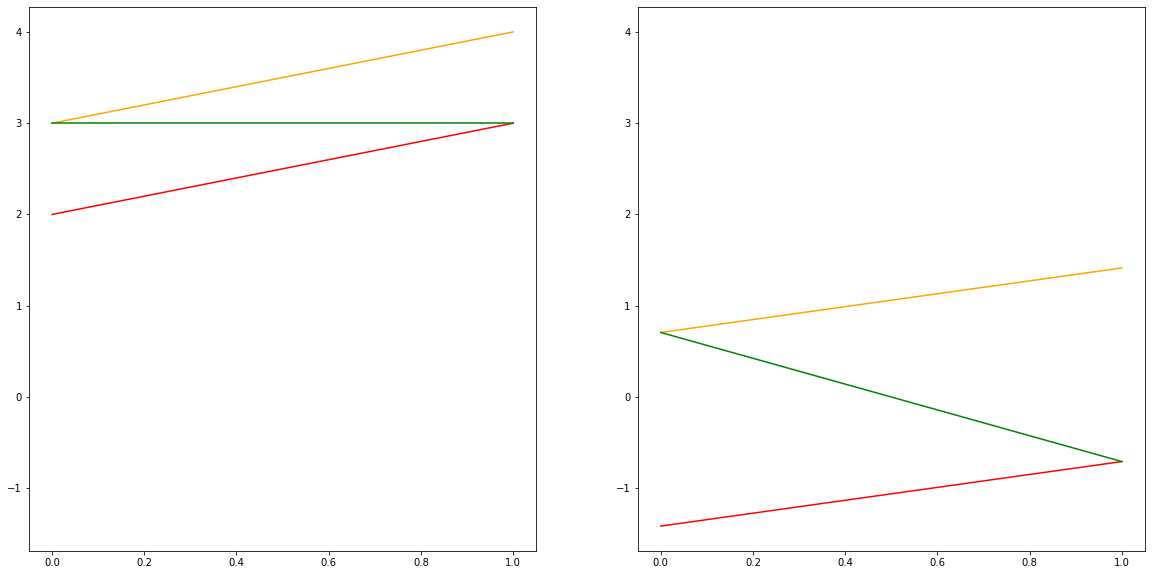

In [15]:
palette = ["red", "green", "orange"]

def df_plot2(df_left, df_right, bin_cols=None, title1="", title2="", show=False, save_path=None, ymax=0.05):
    plt.figure(figsize=(20, 10))

    ax1 = plt.subplot(121)
    ax1.set_title(title1)
    
    for _, row in df_left.iterrows():

        if bin_cols is None:
            data = [row[col]/row["entries"] for col in row.keys() if 'bin_' in col]
        else:
            data = [row[col]/row["entries"] for col in bin_cols]

        data = data[1:-1]

        ax1.plot(range(len(data)), data, color=palette[row['y']])

    ax2 = plt.subplot(122, sharex=ax1, sharey=ax1)
    ax2.set_title(title2)

    bin_cols = [col for col in df.columns if 'bin_' in col]

    # remove first and last values as those are over/under flows
    bin_cols = bin_cols[1:-1]

    X = df_right.filter(bin_cols, axis=1).copy().div(df_right.entries, axis=0)
    y = df_right['y']
    colors = [palette[_y] for _y in y]
    print(colors)
    print(X)
    X = StandardScaler().fit_transform(X)
    print(X)
    
    for _X, _y in zip(X, y):
        ax2.plot(_X, color=palette[_y])
    
    if ymax is not None:
        plt.ylim(ymax=ymax)

        
    if save_path:
        # plt.savefig(Path(save_path).with_suffix(".svg"), format='svg')
        Path(save_path).parent.mkdir(parents=True, exist_ok=True)
        plt.savefig(save_path)

    if show:
        plt.show()

    plt.close()

df = pd.DataFrame({'bin_1': [1,2,3], 'bin_2': [2,3,3], 'bin_3': [3,4,3], 'bin_4': [4,5,3], 'y': [0,2,1], 'entries':[1,1,1]})
df
df_plot2(df, df, show=True, ymax=None)

In [2]:
from sklearn.manifold import TSNE, MDS
from sklearn.decomposition import PCA

# index represents label: 0 BAD, 1 GOOD, 2 ANOM
palette = ["red", "green", "orange"]

In [4]:
# df = pd.read_csv("../data_small/train.csv")
# df = pd.read_csv("../data_0/train.csv")

df = pd.read_csv("../data_raw/chargeInner_PXLayer_1.csv")
df.drop(df[df.entries == 0].index, inplace=True)

bin_cols = [col for col in df.columns if 'bin_' in col]
bin_cols = bin_cols[1:-1]

X = df.filter(bin_cols, axis=1).copy().div(df.entries, axis=0)
# y = df["y"]    
y = [2 for _ in range(len(df))]

colors = [palette[y_] for y_ in y]

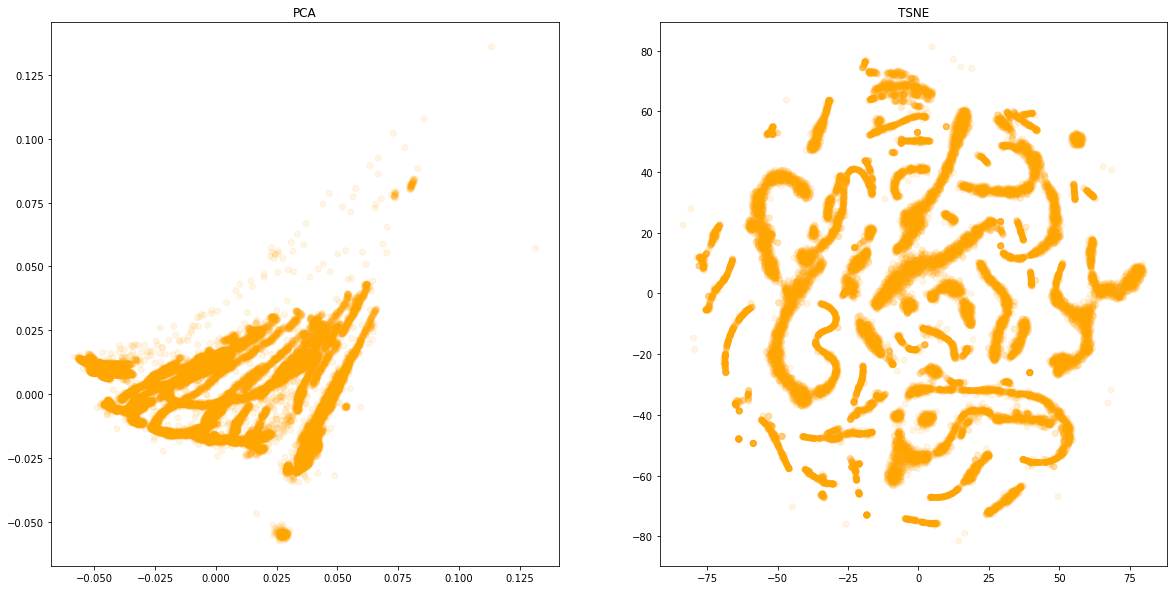

In [7]:
# PCA
pca = PCA(n_components=4, random_state=42)
# pcomp = pca.fit_transform(X)

# TSNE
tsne = TSNE(n_components=2, random_state=42)
# tcomp = tsne.fit_transform(X)

# MDS 
mds = MDS(n_components=4, n_init=1, random_state=42)
# mcomp = mds.fit_transform(X)

plt.figure(figsize=(20, 10))

ax1 = plt.subplot(121)
ax1.set_title("PCA")
ax1.scatter(pcomp[:, 0], pcomp[:, 1], color=colors, alpha=.1, label=y)

ax2 = plt.subplot(122)
ax2.set_title("TSNE")
ax2.scatter(tcomp[:, 0], tcomp[:, 1], color=colors, alpha=.1, label=y)

# ax3 = plt.subplot(133)
# ax3.set_title("MDS")
# ax3.scatter(mcomp[:, 0], mcomp[:, 1], color=colors, alpha=.1, label=y)




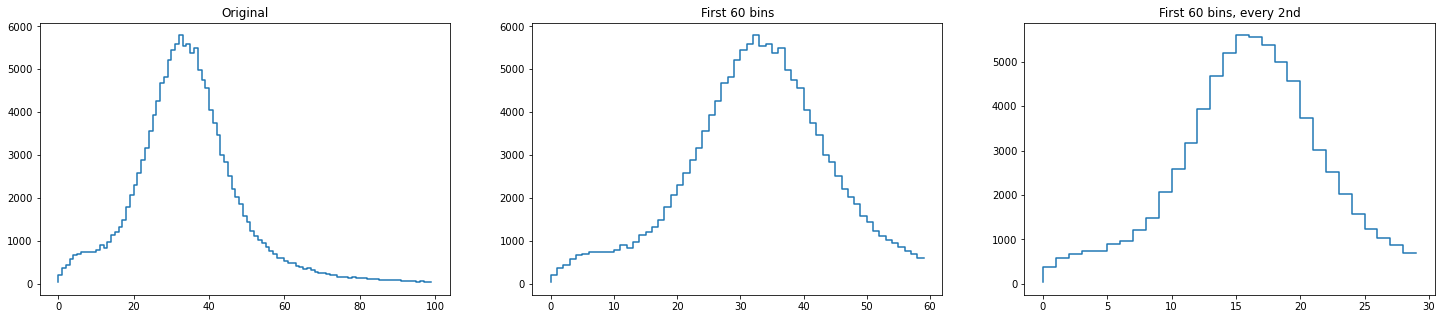

In [68]:
df = pd.read_csv("../data_raw/chargeInner_PXLayer_1.csv")
bin_cols1 = [col for col in df.columns if 'bin_' in col]
bin_cols2 = [f"bin_{i}" for i in range(1, 61)]
bin_cols3 = [f"bin_{i}" for i in range(1, 61, 2)]

data1 =  df.loc[(df['run']==297050) & (df['lumi']==43), bin_cols1].values.flatten().tolist()
data1 = data1[1:-1]

data2 =  df.loc[(df['run']==297050) & (df['lumi']==43), bin_cols2].values.flatten().tolist()
data3 =  df.loc[(df['run']==297050) & (df['lumi']==43), bin_cols3].values.flatten().tolist()

plt.figure(figsize=(25,5))
plt.title("chargeInner_PXLayer_1 Run: 297050 LS: 43")
ax1 = plt.subplot(131)
ax1.set_title("Original")
ax1.plot(range(len(data1)), data1, drawstyle='steps-pre')

ax2 = plt.subplot(132)
ax2.set_title("First 60 bins")
ax2.plot(range(len(data2)), data2, drawstyle='steps-pre')


ax3 = plt.subplot(133)
ax3.set_title("First 60 bins, every 2nd")
ax3.plot(range(len(data3)), data3, drawstyle='steps-pre')



297047 not in gjson_runs
297048 not in gjson_runs
297049 not in gjson_runs
297168 not in gjson_runs
297169 not in gjson_runs
297170 not in gjson_runs
297171 not in gjson_runs
297179 not in gjson_runs
297180 not in gjson_runs
297181 not in gjson_runs
297211 not in gjson_runs
297281 not in gjson_runs
297282 not in gjson_runs
297283 not in gjson_runs
297284 not in gjson_runs
297285 not in gjson_runs
297286 not in gjson_runs
297287 not in gjson_runs
297288 not in gjson_runs
297289 not in gjson_runs
297290 not in gjson_runs
297291 not in gjson_runs
297474 not in gjson_runs
297494 not in gjson_runs
297495 not in gjson_runs
297496 not in gjson_runs
297497 not in gjson_runs
297498 not in gjson_runs
297499 not in gjson_runs
297501 not in gjson_runs
297502 not in gjson_runs
297598 not in gjson_runs
297657 not in gjson_runs
297658 not in gjson_runs
297659 not in gjson_runs
297660 not in gjson_runs
297661 not in gjson_runs
297662 not in gjson_runs
297663 not in gjson_runs
297664 not in gjson_runs


{297050,
 297056,
 297057,
 297099,
 297100,
 297101,
 297113,
 297114,
 297175,
 297176,
 297177,
 297178,
 297215,
 297218,
 297219,
 297224,
 297225,
 297227,
 297292,
 297293,
 297296,
 297308,
 297359,
 297411,
 297424,
 297425,
 297426,
 297429,
 297430,
 297431,
 297432,
 297433,
 297434,
 297435,
 297467,
 297468,
 297469,
 297483,
 297484,
 297485,
 297486,
 297487,
 297488,
 297503,
 297504,
 297505,
 297557,
 297558,
 297562,
 297563,
 297599,
 297603,
 297604,
 297605,
 297606,
 297620,
 297656,
 297665,
 297666,
 297670,
 297674,
 297675,
 297722,
 297723,
 298996,
 298997,
 299000,
 299042,
 299061,
 299062,
 299064,
 299065,
 299067,
 299096,
 299149,
 299178,
 299180,
 299184,
 299185,
 299327,
 299329}

In [30]:
e = set(raw_runs) - set(oms_runs)
e

{297678, 298653, 298678}

In [31]:
set(raw_runs) - set(e)

{297047,
 297048,
 297049,
 297050,
 297056,
 297057,
 297099,
 297100,
 297101,
 297113,
 297114,
 297168,
 297169,
 297170,
 297171,
 297175,
 297176,
 297177,
 297178,
 297179,
 297180,
 297181,
 297211,
 297215,
 297218,
 297219,
 297224,
 297225,
 297227,
 297281,
 297282,
 297283,
 297284,
 297285,
 297286,
 297287,
 297288,
 297289,
 297290,
 297291,
 297292,
 297293,
 297296,
 297308,
 297359,
 297411,
 297424,
 297425,
 297426,
 297429,
 297430,
 297431,
 297432,
 297433,
 297434,
 297435,
 297467,
 297468,
 297469,
 297474,
 297483,
 297484,
 297485,
 297486,
 297487,
 297488,
 297494,
 297495,
 297496,
 297497,
 297498,
 297499,
 297501,
 297502,
 297503,
 297504,
 297505,
 297557,
 297558,
 297562,
 297563,
 297598,
 297599,
 297603,
 297604,
 297605,
 297606,
 297620,
 297656,
 297657,
 297658,
 297659,
 297660,
 297661,
 297662,
 297663,
 297664,
 297665,
 297666,
 297670,
 297671,
 297672,
 297673,
 297674,
 297675,
 297722,
 297723,
 298996,
 298997,
 298998,
 299000,
 